Loading the dataset

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = sns.load_dataset('titanic')
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Checking for missing and duplicated values

In [4]:
data.isnull().sum() # checking for missing values

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
#checking for duplicate datas
data.duplicated().sum()


107

In [6]:
dup = data.drop_duplicates()
dup

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [7]:
dup.duplicated().sum()

0

In [8]:
print(dup.shape) #after dropping duplicated values.
dup.duplicated().sum()

(784, 15)


0

In [9]:
dup.isnull().sum()

survived         0
pclass           0
sex              0
age            106
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           582
embark_town      2
alive            0
alone            0
dtype: int64

In [10]:
obj = dup.select_dtypes(include=["object_",'boolean','category'])
obj

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,male,S,Third,man,True,NaN,Southampton,no,False
1,female,C,First,woman,False,C,Cherbourg,yes,False
2,female,S,Third,woman,False,NaN,Southampton,yes,True
3,female,S,First,woman,False,C,Southampton,yes,False
4,male,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...
885,female,Q,Third,woman,False,NaN,Queenstown,no,False
887,female,S,First,woman,False,B,Southampton,yes,True
888,female,S,Third,woman,False,NaN,Southampton,no,False
889,male,C,First,man,True,C,Cherbourg,yes,True


In [11]:
for col in obj:
    obj[col]=obj[col].fillna(obj[col].mode()[0])

obj

,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,male,S,Third,man,True,C,Southampton,no,False
1,female,C,First,woman,False,C,Cherbourg,yes,False
2,female,S,Third,woman,False,C,Southampton,yes,True
3,female,S,First,woman,False,C,Southampton,yes,False
4,male,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...
885,female,Q,Third,woman,False,C,Queenstown,no,False
887,female,S,First,woman,False,B,Southampton,yes,True
888,female,S,Third,woman,False,C,Southampton,no,False
889,male,C,First,man,True,C,Cherbourg,yes,True


In [12]:
obj.isna().sum()

sex            0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [13]:
numerical = dup.select_dtypes(include=["number"])
numerical

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [14]:
for col in numerical:
    numerical[col] = numerical[col].fillna(numerical[col].median())
numerical

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.00,1,0,7.2500
1,1,1,38.00,1,0,71.2833
2,1,3,26.00,0,0,7.9250
3,1,1,35.00,1,0,53.1000
4,0,3,35.00,0,0,8.0500
...,...,...,...,...,...,...
885,0,3,39.00,0,5,29.1250
887,1,1,19.00,0,0,30.0000
888,0,3,28.25,1,2,23.4500
889,1,1,26.00,0,0,30.0000


In [15]:
numerical.isna().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [16]:
df = pd.concat([numerical,obj], axis=1)
df.head()

,survived,pclass,age,sibsp,parch,fare,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,22.0,1,0,7.2500,male,S,Third,man,True,C,Southampton,no,False
1,1,1,38.0,1,0,71.2833,female,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,26.0,0,0,7.9250,female,S,Third,woman,False,C,Southampton,yes,True
3,1,1,35.0,1,0,53.1000,female,S,First,woman,False,C,Southampton,yes,False
4,0,3,35.0,0,0,8.0500,male,S,Third,man,True,C,Southampton,no,True


In [17]:
df.isna().sum()

survived       0
pclass         0
age            0
sibsp          0
parch          0
fare           0
sex            0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [18]:
df.duplicated().sum()

1

In [19]:
df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [20]:
df = df.drop_duplicates()
df

,survived,pclass,age,sibsp,parch,fare,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,22.00,1,0,7.2500,male,S,Third,man,True,C,Southampton,no,False
1,1,1,38.00,1,0,71.2833,female,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,26.00,0,0,7.9250,female,S,Third,woman,False,C,Southampton,yes,True
3,1,1,35.00,1,0,53.1000,female,S,First,woman,False,C,Southampton,yes,False
4,0,3,35.00,0,0,8.0500,male,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.00,0,5,29.1250,female,Q,Third,woman,False,C,Queenstown,no,False
887,1,1,19.00,0,0,30.0000,female,S,First,woman,False,B,Southampton,yes,True
888,0,3,28.25,1,2,23.4500,female,S,Third,woman,False,C,Southampton,no,False
889,1,1,26.00,0,0,30.0000,male,C,First,man,True,C,Cherbourg,yes,True


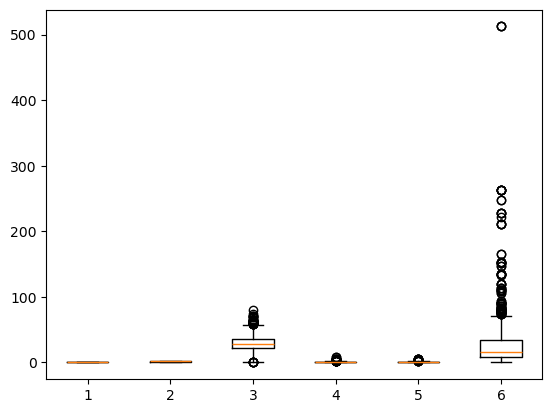

In [26]:
plt.boxplot(numerical)
plt.show()

In [27]:
def remove_outliers(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    df[column_name] = df[column_name].clip(upper=upper_bound)
    df[column_name] = df[column_name].clip(lower=lower_bound)
    return df[column_name]

In [28]:
for col in numerical:
  numerical[col] = remove_outliers(numerical, col)

numerical

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.00,1.0,0.0,7.2500
1,1,1,38.00,1.0,0.0,71.2833
2,1,3,26.00,0.0,0.0,7.9250
3,1,1,35.00,1.0,0.0,53.1000
4,0,3,35.00,0.0,0.0,8.0500
...,...,...,...,...,...,...
885,0,3,39.00,0.0,2.5,29.1250
887,1,1,19.00,0.0,0.0,30.0000
888,0,3,28.25,1.0,2.0,23.4500
889,1,1,26.00,0.0,0.0,30.0000


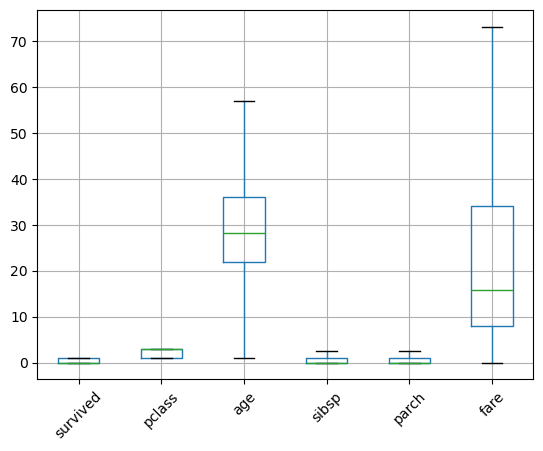

In [29]:
numerical.boxplot()
plt.xticks(rotation=45)
plt.show()
#removed outliers

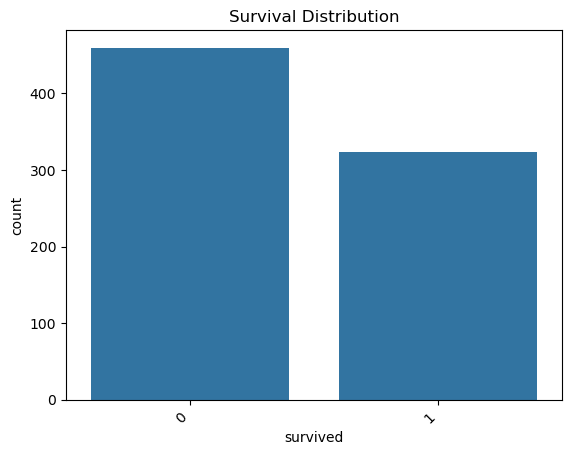

In [22]:
sns.countplot(x='survived', data=df)
plt.title('Survival Distribution')
plt.xlabel('survived')
plt.xticks(rotation=45, ha='right')
plt.show()

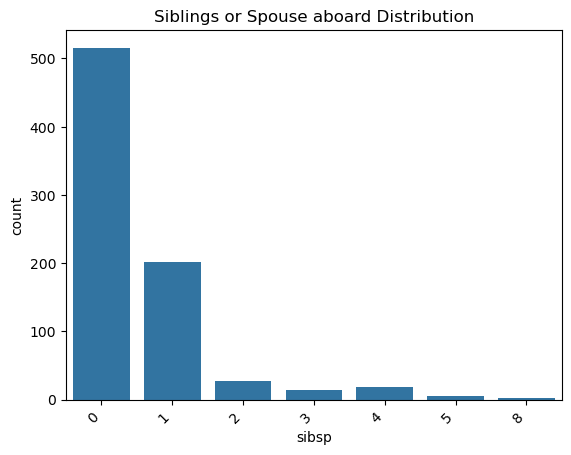

In [102]:
sns.countplot(x='sibsp', data=df)
plt.title('Siblings or Spouse aboard Distribution')
plt.xlabel('sibsp')
plt.xticks(rotation=45, ha='right')
plt.show()

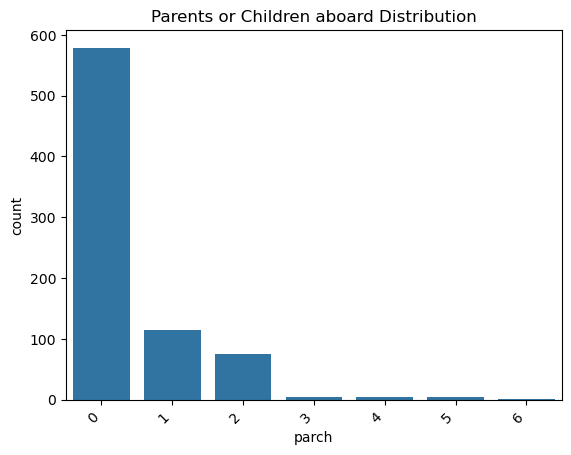

In [100]:
sns.countplot(x='parch', data=df)
plt.title('Parents or Children aboard Distribution')
plt.xlabel('parch')
plt.xticks(rotation=45, ha='right')
plt.show()

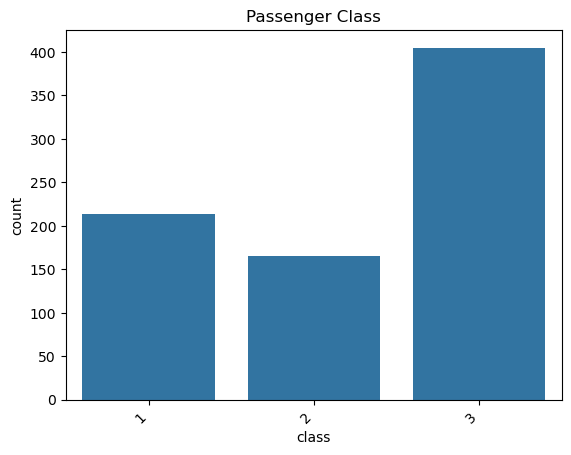

In [23]:
sns.countplot(x='pclass', data=df)
plt.title('Passenger Class')
plt.xlabel('class')
plt.xticks(rotation=45, ha='right')
plt.show()

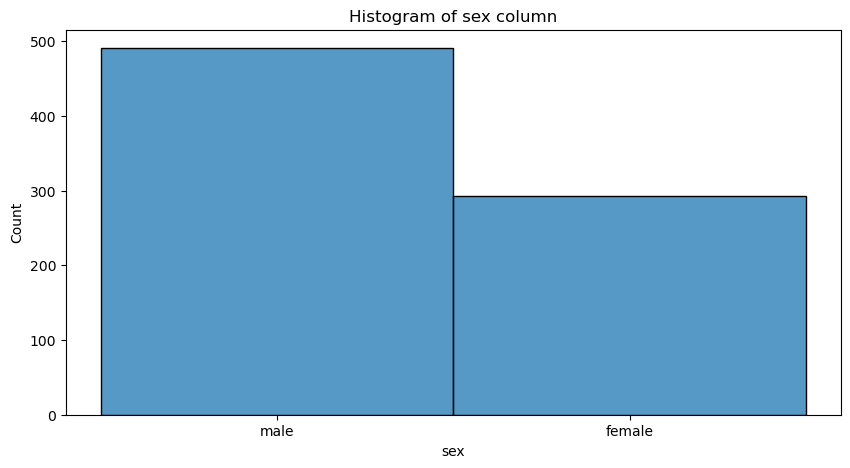

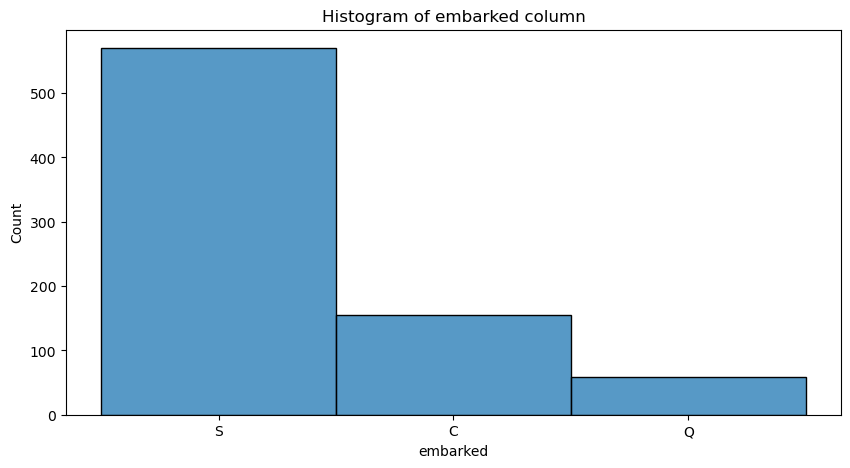

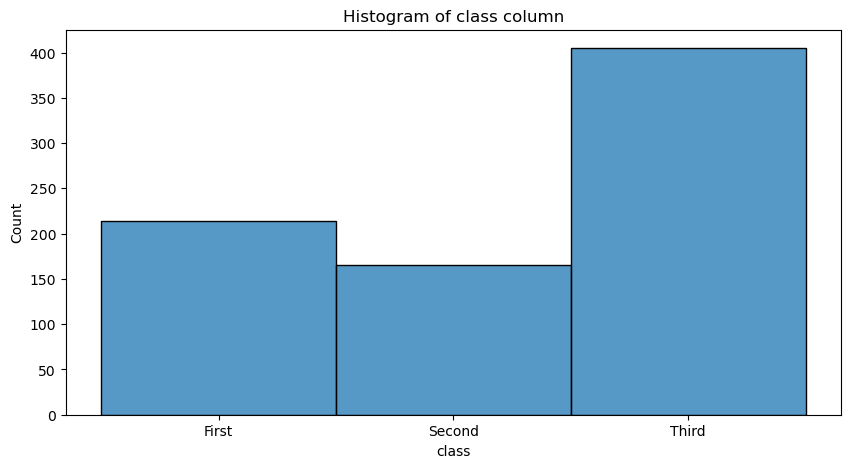

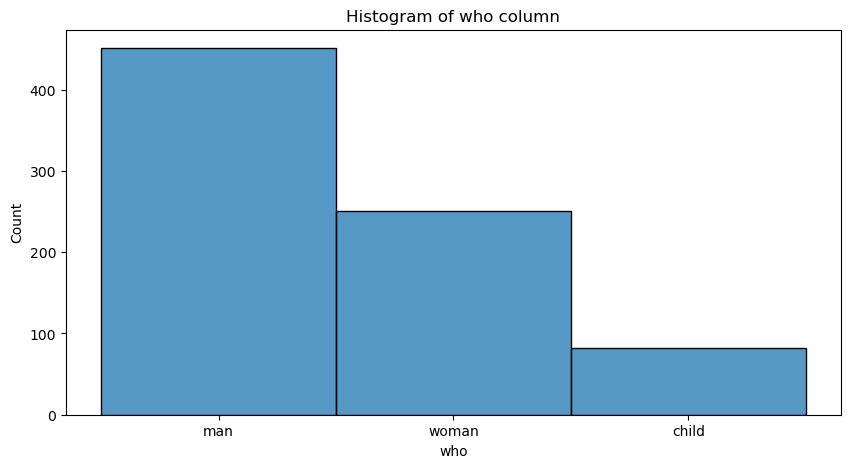

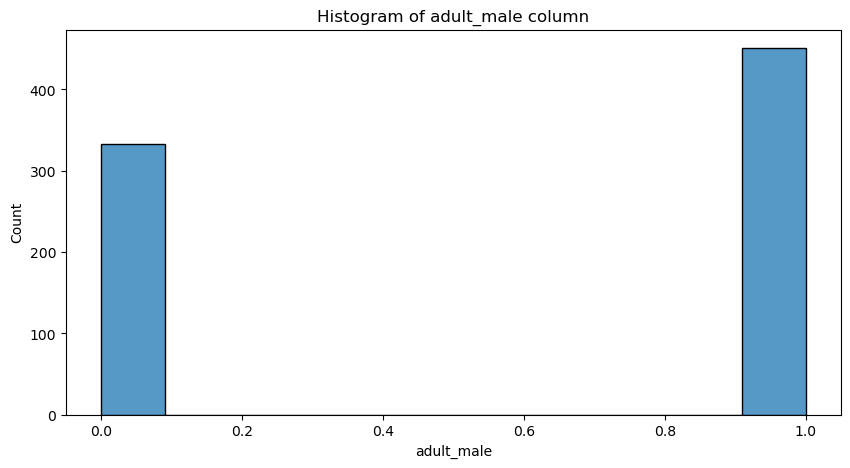

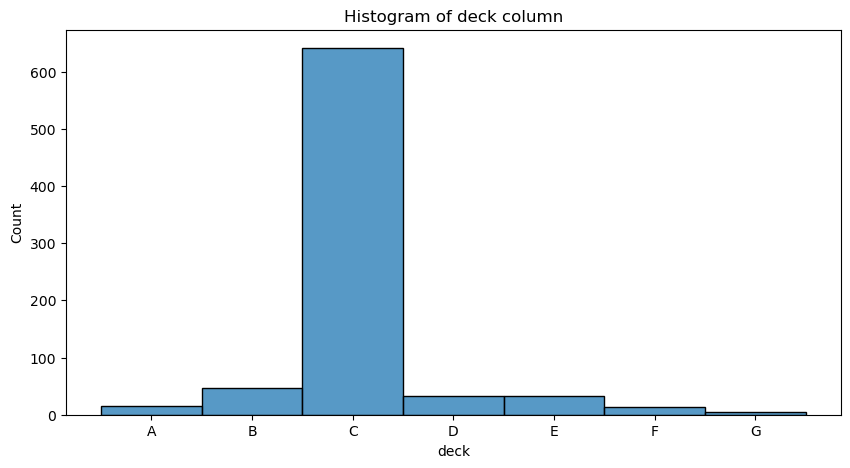

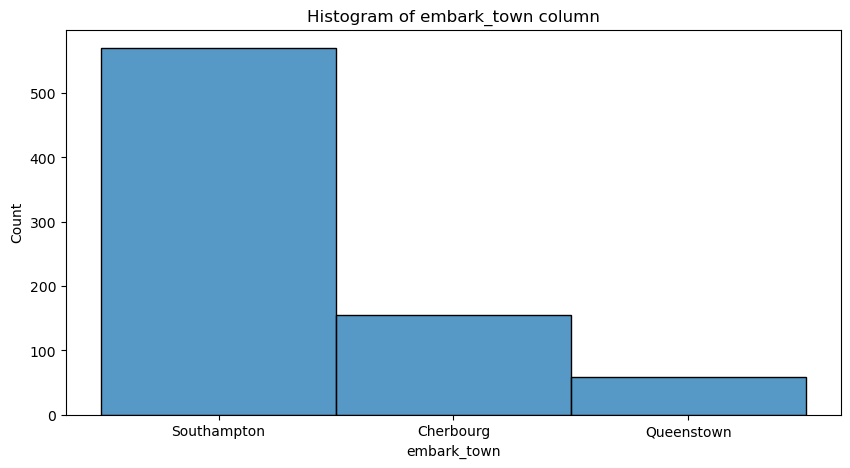

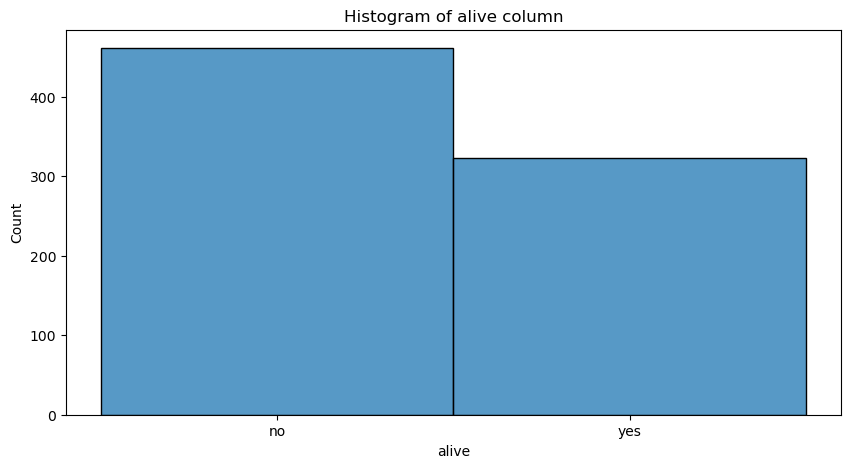

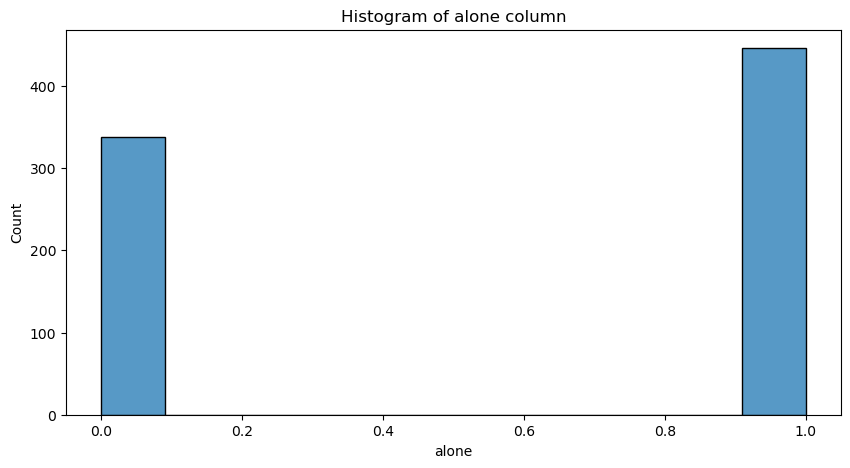

In [60]:
for c in obj:
    plt.figure(figsize=(10,5))
    sns.histplot(obj[c])
    plt.title('Histogram of {} column'.format(c))
    plt.xlabel(c)
    plt.ylabel('Count')
    plt.show()

array([[<Axes: title={'center': 'survived'}>,
        <Axes: title={'center': 'pclass'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'sibsp'}>],
       [<Axes: title={'center': 'parch'}>,
        <Axes: title={'center': 'fare'}>]], dtype=object)

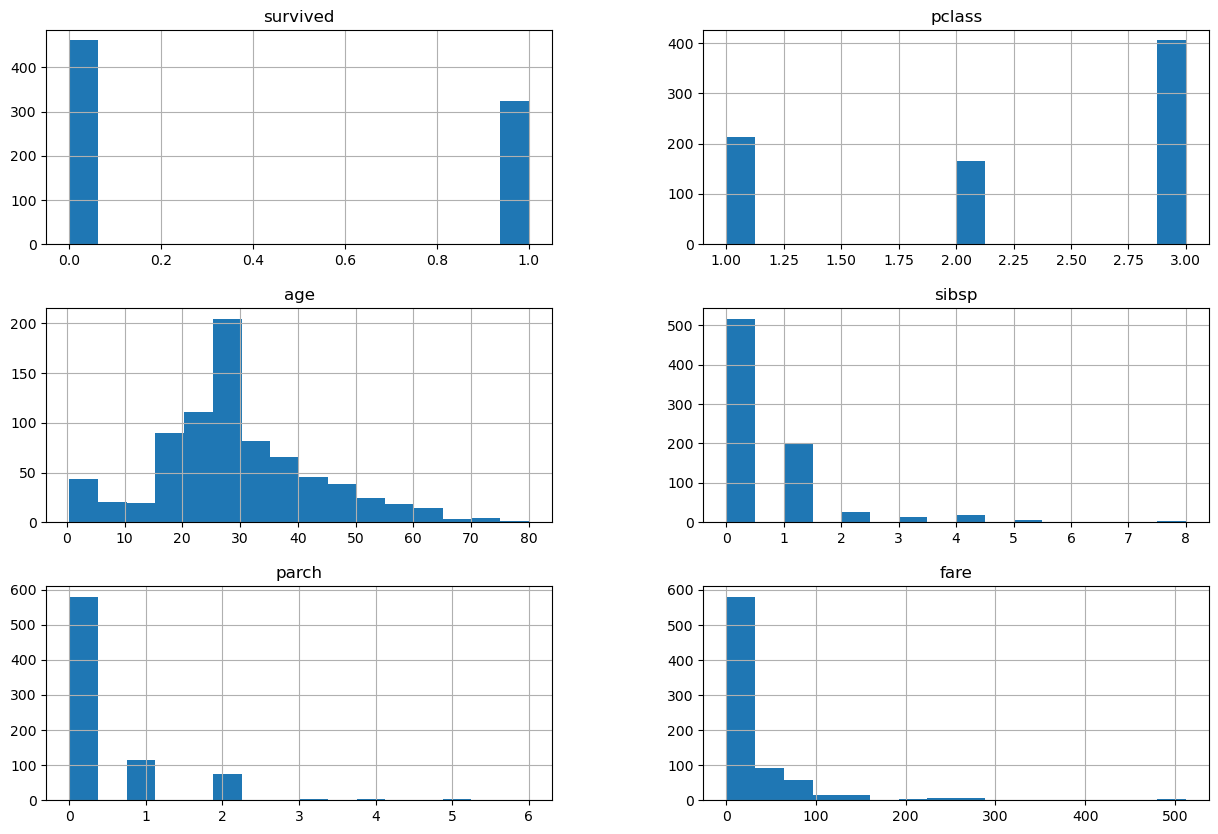

In [21]:
numerical.hist(bins=16, figsize=(15,10))

BIVARIATE ANALYSIS


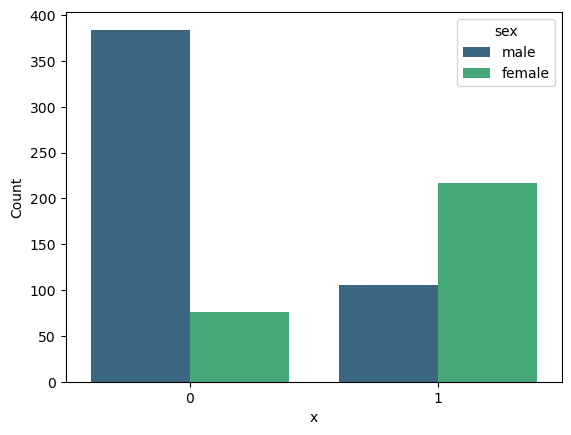

In [90]:
sns.countplot(x='survived', data=df, palette='viridis',hue= 'sex', legend=True)
plt.xlabel("x")
plt.ylabel("Count")
plt.show()

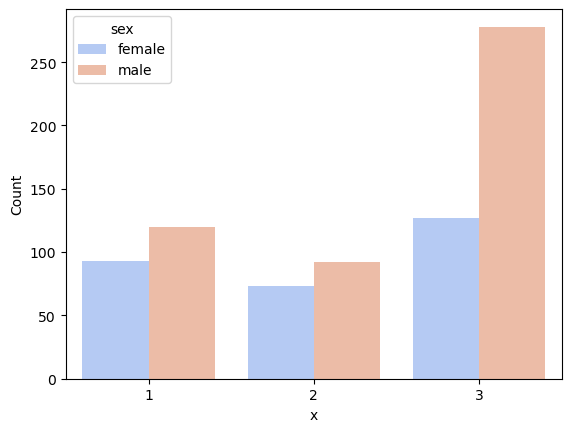

In [92]:
sns.countplot(x='pclass', data=df, palette='coolwarm',hue= 'sex', legend=True)
plt.xlabel("x")
plt.ylabel("Count")
plt.show()

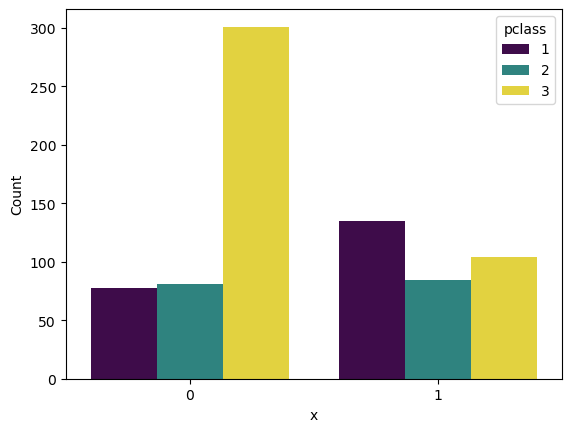

In [86]:
sns.countplot(x='survived', data=df, palette='viridis',hue= 'pclass', legend=True)
plt.xlabel("x")
plt.ylabel("Count")
plt.show()

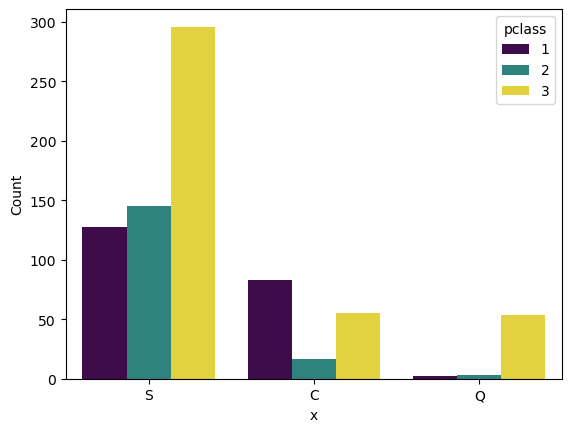

In [94]:
sns.countplot(x='embarked', data=df, palette='viridis',hue= 'pclass', legend=True)
plt.xlabel("x")
plt.ylabel("Count")
plt.show()

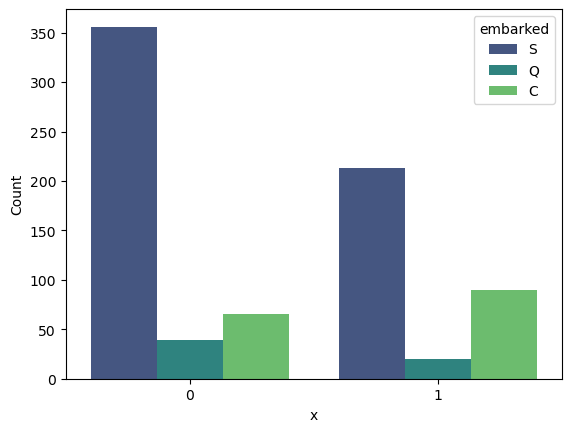

In [96]:
sns.countplot(x='survived', data=df, palette='viridis',hue= 'embarked', legend=True)
plt.xlabel("x")
plt.ylabel("Count")
plt.show()

MULTIVARIATE ANALYSIS

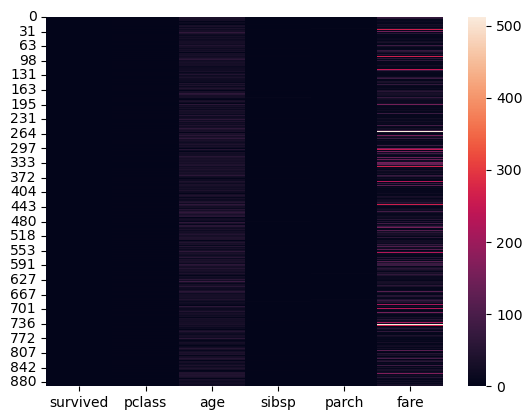

In [24]:
sns.heatmap(numerical)
plt.show()

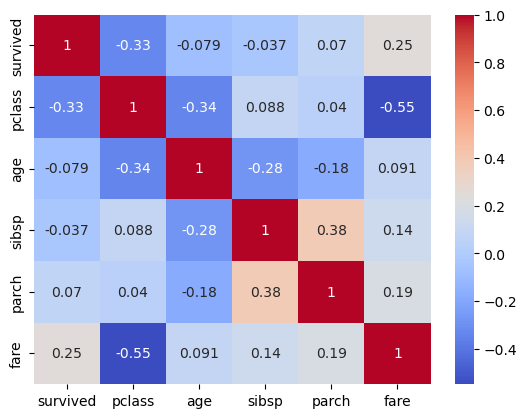

In [25]:
sns.heatmap(numerical.corr(), annot=True, cmap='coolwarm')
plt.show()